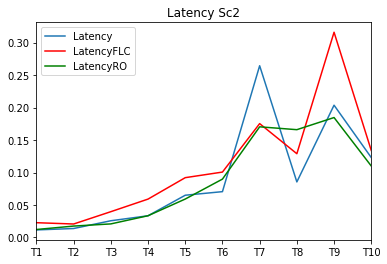

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wsn2 = pd.read_csv('wsn2.csv', usecols=['run', 'type', 'module', 'name', 'value', 'mean'])

run = "wsnSc2T"
totalPkSentCount = []
totalPkReceivedCount = []
packetLoss = []
consumedPower = []
latencyMean = []
jitterMean = []

totalPkSentCountRO = []
totalPkReceivedCountRO = []
packetLossRO = []
consumedPowerRO = []
latencyMeanRO = []
jitterMeanRO = []

totalPkSentCountFLC = []
totalPkReceivedCountFLC = []
packetLossFLC = []
consumedPowerFLC = []
latencyMeanFLC = []
jitterMeanFLC = []

for i in range(1, 11):
    packetSentCount = wsn2[(wsn2.run.str.startswith('wsnSc2T'+str(i)+'-2')) & (wsn2.type=='scalar') & 
                             (wsn2.module.str.startswith("Sc2.sensor")) & (wsn2.module.str.endswith("udp")) & 
                             (wsn2.name=='packetSent:count')]   

    packetReceivedCount = wsn2[(wsn2.run.str.startswith('wsnSc2T'+str(i)+'-2'))& (wsn2.type=='scalar') & 
                                 (wsn2.module.str.startswith("Sc2.sink")) & 
                                 (wsn2.module.str.endswith("udp")) & (wsn2.name=='packetReceived:count')]

    totalPkSentCount.append(sum(packetSentCount.value))
    totalPkReceivedCount.append(sum(packetReceivedCount.value))
    packetLoss.append((totalPkSentCount[i-1] - totalPkReceivedCount[i-1]) * 100 / totalPkSentCount[i-1])


    residualEnergy = wsn2[(wsn2.run.str.startswith('wsnSc2T'+str(i)+'-2')) & (wsn2.type=='scalar') & 
                            (wsn2.name=='residualEnergyCapacity:last') & 
                            (wsn2.module.str.endswith('energyStorage'))] 

    spentEnergyJ = 9000 - sum(residualEnergy.value)
    consumedPower.append(spentEnergyJ / 240)

    latency = wsn2[(wsn2.run.str.startswith('wsnSc2T'+str(i)+'-2')) & (wsn2.type=='histogram') & 
                     (wsn2.name=='endToEndDelay:histogram')] 

    latencyMean.append(latency["mean"].mean())
 
    jitter = wsn2[(wsn2.run.str.startswith('wsnSc2T'+str(i)+'-2')) & (wsn2.type=='histogram') & 
                    (wsn2.name=='jitter:histogram')] 
    
    jitterMean.append(jitter["mean"].mean())   
    
    
                        ########################################################
                        ########    Simulation with RANDOM OFF        ##########
                        ########################################################
                
    
    packetSentCountRO = wsn2[(wsn2.run.str.startswith('wsnSc2T'+str(i)+'-1')) & (wsn2.type=='scalar') & 
                             (wsn2.module.str.startswith("Sc2.sensor")) & (wsn2.module.str.endswith("udp")) & 
                             (wsn2.name=='packetSent:count')]   

    packetReceivedCountRO = wsn2[(wsn2.run.str.startswith('wsnSc2T'+str(i)+'-1'))& (wsn2.type=='scalar') & 
                                 (wsn2.module.str.startswith("Sc2.sink")) & 
                                 (wsn2.module.str.endswith("udp")) & (wsn2.name=='packetReceived:count')]

    totalPkSentCountRO.append(sum(packetSentCountRO.value))
    totalPkReceivedCountRO.append(sum(packetReceivedCountRO.value))
    packetLossRO.append((totalPkSentCountRO[i-1] - totalPkReceivedCountRO[i-1]) * 100 / totalPkSentCountRO[i-1])

    residualEnergyRO = wsn2[(wsn2.run.str.startswith('wsnSc2T'+str(i)+'-1')) & (wsn2.type=='scalar') & 
                            (wsn2.name=='residualEnergyCapacity:last') & 
                            (wsn2.module.str.endswith('energyStorage'))] 

    spentEnergyJRO = 9000 - sum(residualEnergyRO.value)
    consumedPowerRO.append(spentEnergyJRO / 240)

    latencyRO = wsn2[(wsn2.run.str.startswith('wsnSc2T'+str(i)+'-1')) & (wsn2.type=='histogram') & 
                     (wsn2.name=='endToEndDelay:histogram')] 

    latencyMeanRO.append(latencyRO["mean"].mean())
    
    jitterRO = wsn2[(wsn2.run.str.startswith('wsnSc2T'+str(i)+'-1')) & (wsn2.type=='histogram') & 
                    (wsn2.name=='jitter:histogram')] 
    
    jitterMeanRO.append(jitterRO["mean"].mean())
    
    
    
                        ########################################################
                        ########Simulation with FUZZY LOGIC CONTROLLER##########
                        ########################################################
    
    packetSentCountFLC = wsn2[(wsn2.run.str.startswith('wsnSc2T'+str(i)+'-0')) & (wsn2.type=='scalar') & 
                                (wsn2.module.str.startswith("Sc2.sensor")) & 
                                (wsn2.module.str.endswith("udp")) & (wsn2.name=='packetSent:count')] 

    packetReceivedCountFLC = wsn2[(wsn2.run.str.startswith('wsnSc2T'+str(i)+'-0'))& (wsn2.type=='scalar') & 
                                    (wsn2.module.str.startswith("Sc2.sink")) & 
                                    (wsn2.module.str.endswith("udp")) & (wsn2.name=='packetReceived:count')]

    totalPkSentCountFLC.append(sum(packetSentCountFLC.value))
    totalPkReceivedCountFLC.append(sum(packetReceivedCountFLC.value))
    packetLossFLC.append((totalPkSentCountFLC[i-1] - totalPkReceivedCountFLC[i-1]) * 100 / totalPkSentCountFLC[i-1])


    residualEnergyFLC = wsn2[(wsn2.run.str.startswith('wsnSc2T'+str(i)+'-0')) & (wsn2.type=='scalar') & 
                               (wsn2.name=='residualEnergyCapacity:last') & 
                               (wsn2.module.str.endswith('energyStorage'))] 

    spentEnergyJFLC = 9000 - sum(residualEnergyFLC.value)
    consumedPowerFLC.append(spentEnergyJFLC / 240)

    latencyFLC = wsn2[(wsn2.run.str.startswith('wsnSc2T'+str(i)+'-0')) & (wsn2.type=='histogram') & 
                        (wsn2.name=='endToEndDelay:histogram')] 

    latencyMeanFLC.append(latencyFLC["mean"].mean())

    jitterFLC = wsn2[(wsn2.run.str.startswith('wsnSc2T'+str(i)+'-0')) & 
                       (wsn2.type=='histogram') & (wsn2.name=='jitter:histogram')] 

    jitterMeanFLC.append(jitterFLC["mean"].mean()) 
    
                        ########################################################
                        ########                 RESULTS             ##########
                        ########################################################
            
results = pd.DataFrame(index=['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10'])
results.insert(0, "PacketsSent", totalPkSentCount)  
results.insert(1, "PacketsSentFLC", totalPkSentCountFLC)  
results.insert(2, "PacketsSentRO", totalPkSentCountRO)  
results.insert(3, "PacketsReceived", totalPkReceivedCount)  
results.insert(4, "PacketsReceivedFLC", totalPkReceivedCountFLC)  
results.insert(5, "PacketsReceivedRO", totalPkReceivedCountRO)  
results.insert(6, "PacketsLost(%)", packetLoss)  
results.insert(7, "PacketsLostFLC(%)", packetLossFLC)  
results.insert(8, "PacketsLostRO(%)", packetLossRO)  
results.insert(9, "Jitter", jitterMean)  
results.insert(10, "JitterFLC", jitterMeanFLC)  
results.insert(11, "JitterRO", jitterMeanRO)  
results.insert(12, "Latency", latencyMean)  
results.insert(13, "LatencyFLC", latencyMeanFLC)  
results.insert(14, "LatencyRO", latencyMeanRO)  
results.insert(15, "PowerConsumed(W)", consumedPower)  
results.insert(16, "PowerConsumedFLC(W)", consumedPowerFLC)  
results.insert(17, "PowerConsumedRO(W)", consumedPowerRO)  

results.to_csv('outSc2.csv')
ax = plt.gca()

#results.plot(kind='line',y='PowerConsumed(W)', ax=ax)
#results.plot(kind='line',y='PowerConsumedFLC(W)', color='red', ax=ax)
#results.plot(kind='line',y='PowerConsumedRO(W)', color='green', ax=ax)
#plt.title('Power Consumption Sc2')
#plt.savefig('Sc2PowerConsumptionGraphic.png')

#results.plot(kind='line',y='PacketsLost(%)', ax=ax)
#results.plot(kind='line',y='PacketsLostFLC(%)', color='red', ax=ax)
#results.plot(kind='line',y='PacketsLostRO(%)', color='green', ax=ax)
#plt.title('Packet Loss Sc2')
#plt.savefig('Sc2PacketsLossGraphic.png')

#results.plot(kind='line',y='Jitter', ax=ax)
#results.plot(kind='line',y='JitterFLC', color='red', ax=ax)
#results.plot(kind='line',y='JitterRO', color='green', ax=ax)
#plt.title('Jitter Sc2')
#plt.savefig('Sc2JitterGraphic.png')

results.plot(kind='line',y='Latency', ax=ax)
results.plot(kind='line',y='LatencyFLC', color='red', ax=ax)
results.plot(kind='line',y='LatencyRO', color='green', ax=ax)
plt.title('Latency Sc2')
plt.savefig('Sc2LatencyGraphic.png')

        
#print(results)
